# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 7

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **24 апреля в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [113]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

## Задача 1 

(6 баллов)

Проводится испытание нового учебника по математике. Для исследований были отобраны 2500 школьников. Некоторые из них учились по новому учебнику, а другие — по старому. Измеряется количество школьников, сдавших пробный ЕГЭ на 4 и 5. В первой группе экзамен хорошо сдали 853  из 1719 школьников, учившихся по новому учебнику. Во второй группе значимое улучшение наблюдается среди  хорошо сдали 369  из 781 школьников, учившихся по старому. Влияет ли новый
учебник на результаты школьников?

*Основной поток* (+4 балла): Посчитайте коэффициенты ассоциации, контингенции и коэффициент корреляции Крамера. Сделайте выводы.

*Задачу можно писать на листочке. Все совпадения с реальными лицами и ситуациями случайны:)*

In [139]:
table = [[853, 866], [369, 412]]
st, p = sps.chi2_contingency(table, correction=False)[:2]
print('Знвчение статистики хи-квадрат =', st)
print('p-value =', p)
print("Отвергаем:", p < 0.05)

a = 853
b = 866
c = 369
d = 412
q = (a * d - b * c) / (a * d + b * c)
v = (a * d - b * c) / np.sqrt((a + b) * (a + c) * (b + d) * (c + d))
print('Коэффициент accoциации =', q)
print('Коэффициент контингенции =', v)

#Коэффициент корреляции Крамера
phi = np.sqrt(st / 2500)
print('Коэффициент корреляции Крамера =', phi)

Знвчение статистики хи-квадрат = 1.2119986979549098
p-value = 0.2709366458347927
Отвергаем: False
Коэффициент accoциации = 0.0475148660933844
Коэффициент контингенции = 0.022018162484230275
Коэффициент корреляции Крамера = 0.02201816248423024


**Вывод:** применив метод Хи-квадрат для таблиц сопряжёности, мы получили, что нулевая гипотеза (отличие нового и старого учебника отсутствует) не отвергается, что означает, что у нас недостаточно данных, чтобы доказать эффективность нового учебника и пока мы считаем его неэффективным. 

---

## Задача 2

Рассмотрим последовательность чисел

    1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17 


*Базовый поток* (4 балла): Посчитайте коэффициенты корреляции Пирсона, Спирмена и Кендалла для этой последовательности и последовательности 

    1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Сделайте выводы.

In [152]:
x = [1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17]
n = np.arange(1, 11, 1)
print("КК Пирсона:", sps.pearsonr(x, n)[0])
print("КК Спирмена:", sps.spearmanr(x, n)[0])
print("КК Кендалла:", sps.kendalltau(x, n)[0])

КК Пирсона: 0.9921982950286269
КК Спирмена: 0.9999999999999999
КК Кендалла: 0.9999999999999999


**Вывод:** данные видимо лежат на монотонной кривой, поэтому КК Спирмена и Кендалл почти 1, а Пирсон чуть меньше, но близок к 1.

*Основной поток* (8 баллов): Можно ли на уровне значимости 0.05 считать, что эта последовательность чисел 
является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины? Вывод сделайте на основе коэффициентов корреляции. Придумайте алгоритм проверки самостоятельно.

---

Метод проверки: разобьём наш вектор на 2 по 5 компонент и посмотрим КК, если они независимы, то для  разбиения КК будут низкие и гипотеза о их независимости не будет отвергаться (так как мы искусственнно не меняем порядок):

In [153]:
x = [1.05, 1.12, 1.37, 1.50, 1.51]
y = [1.73, 1.85, 1.98, 2.03, 2.17]
print("КК Пирсона:", sps.pearsonr(x, y)[0])
print("КК Спирмена:", sps.spearmanr(x, y)[0])
print("КК Кендалла:", sps.kendalltau(x, y)[0])

КК Пирсона: 0.9485269820357345
КК Спирмена: 0.9999999999999999
КК Кендалла: 0.9999999999999999


Далее рассмотрим критерий по КК Кендалла, так как размер выборки небольшой:

In [158]:
p = sps.kendalltau(x, y)[1]
print("p-value:", p)
print("Отвергаем:", p < 0.05)

p-value: 0.016666666666666666
Отвергаем: True


Таким образом мы отвергли независимость выборок, то есть на уровне значимости 0.05 нельзя утверждать, что эта последовательность чисел является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины.

## Задача 3: Белые мыши наносят ответный удар

(14 баллов)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [114]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [115]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей каждого класса:

In [116]:
data['class'].value_counts()

c-SC-m    150
c-CS-m    150
c-SC-s    135
t-SC-s    135
c-CS-s    135
t-CS-m    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [117]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

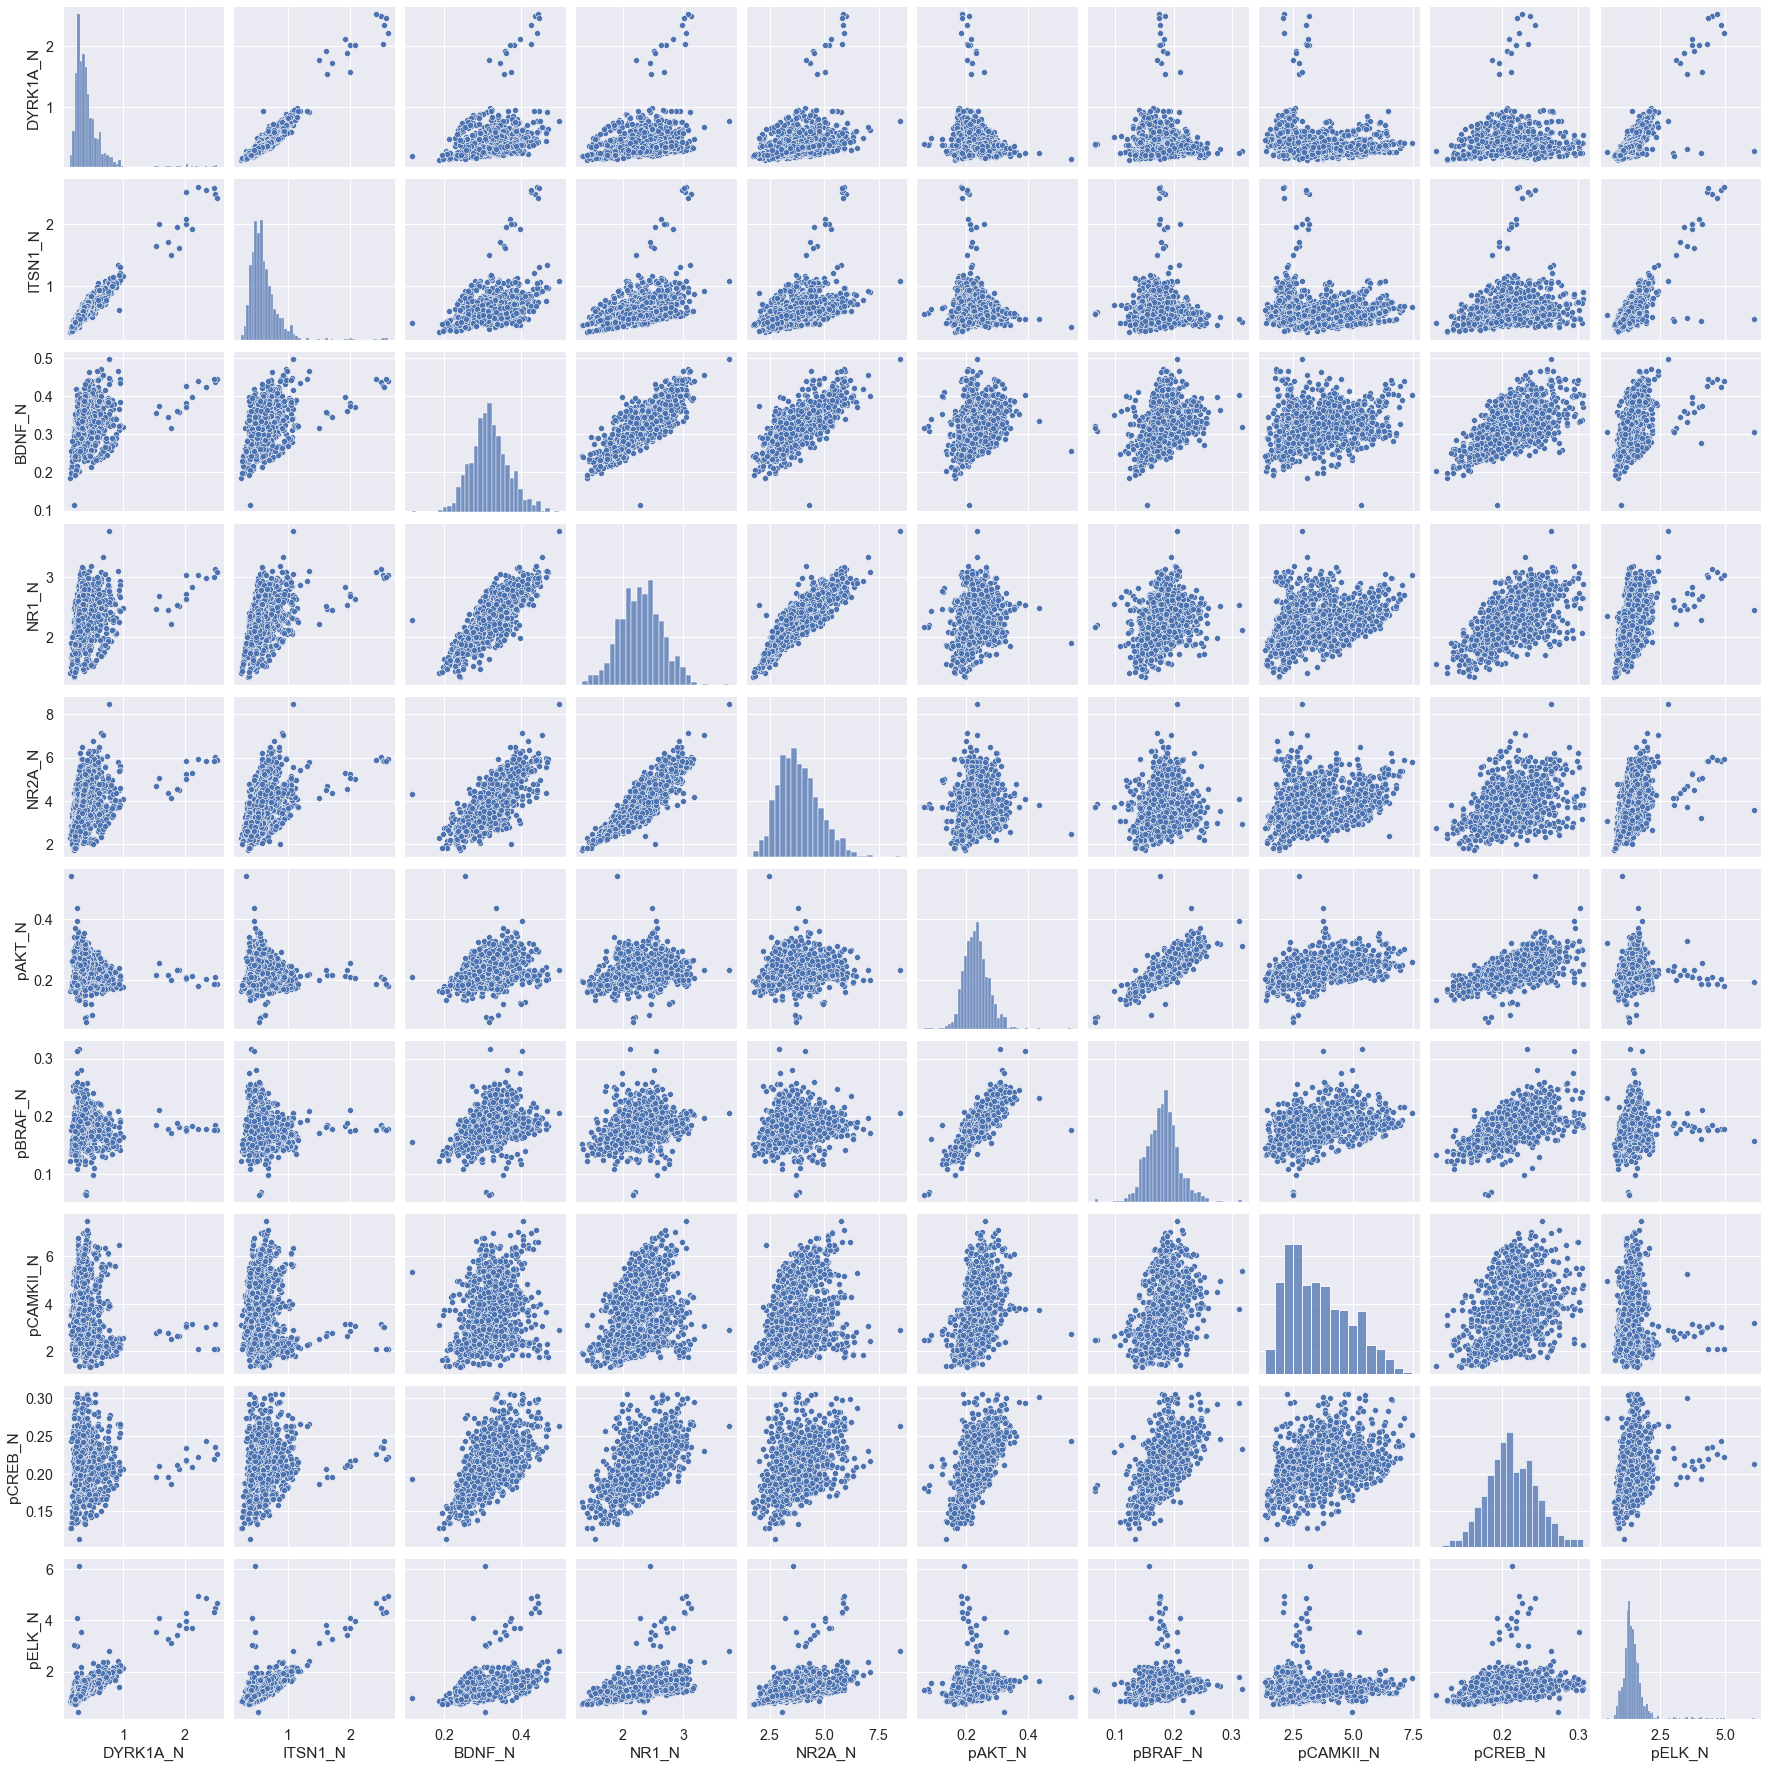

In [118]:
sns.pairplot(data.iloc[:, 1:11])

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

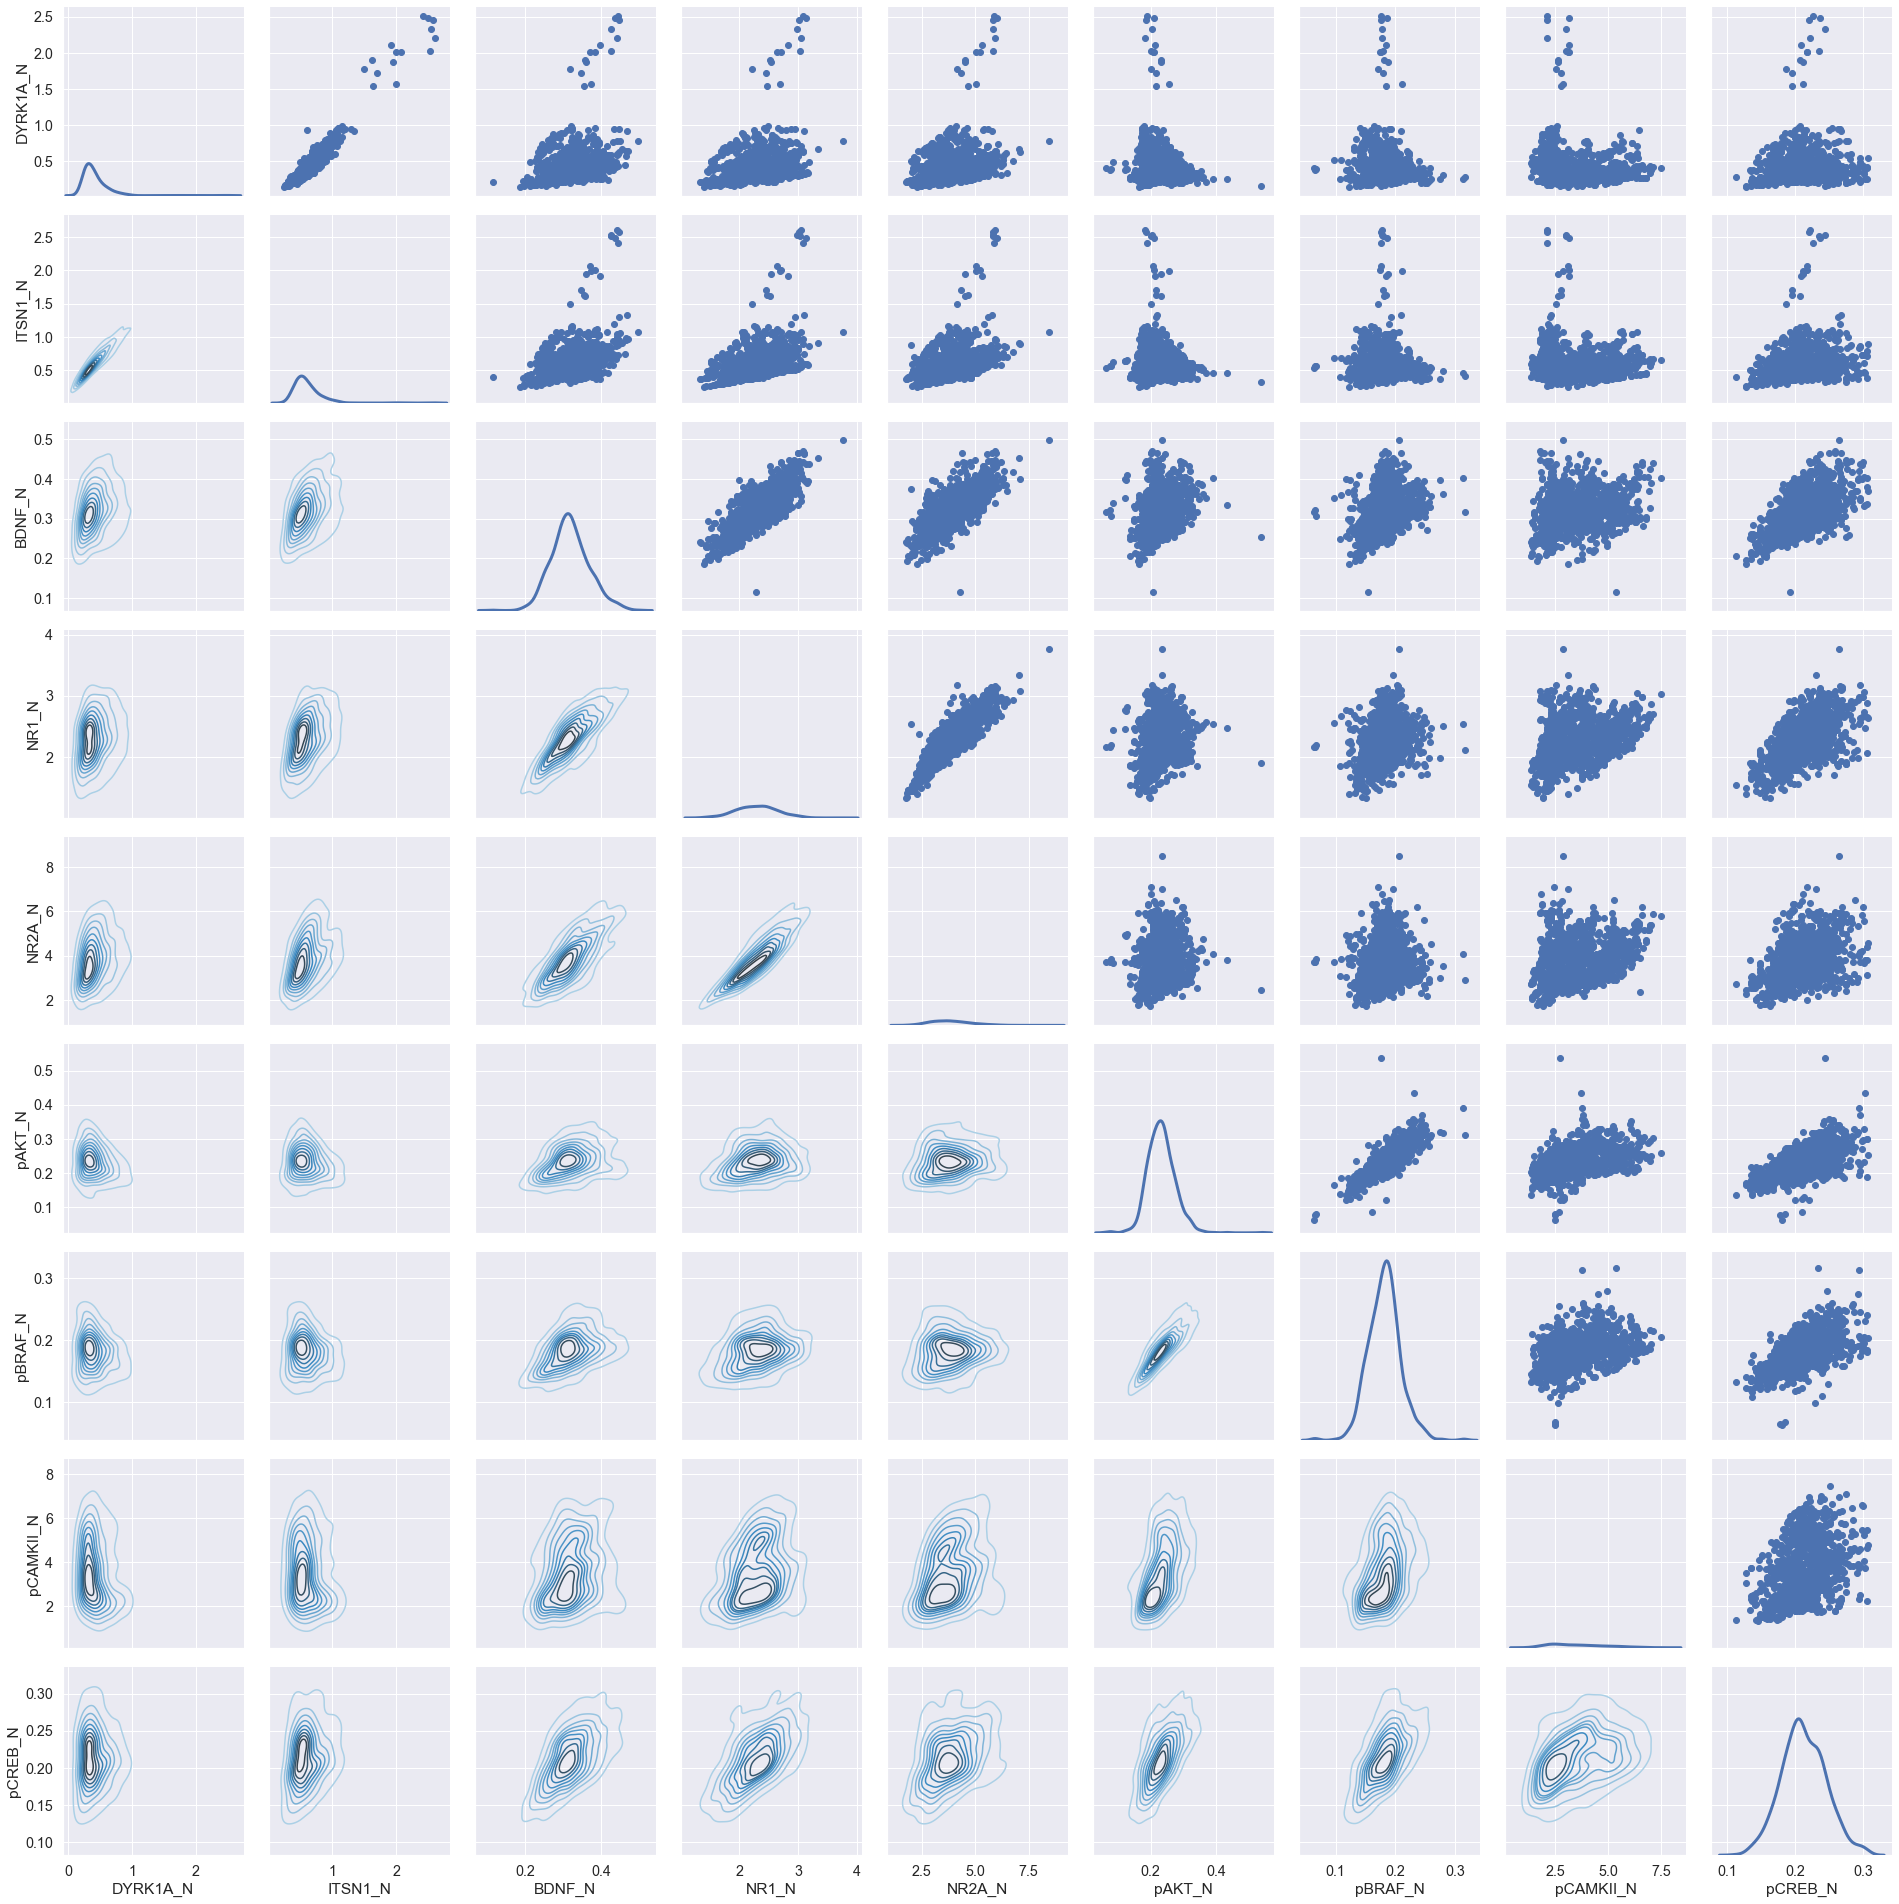

In [119]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Посчитайте корреляционную матрицу признаков, соответствующих белкам, и выведите ее с помощью `sns.heatmap`, также выведя значения коэффициентов корреляции в ячейках матрицы.

а) для первых 15 признаков. Сравните корреляционные матрицы, полученные  с использованием трех известных вам коэффициентов корреляции.


б) для всех признаков с использованием коэффициента Спирмена.


In [120]:
data1 = data.iloc[:, 1:16].dropna()
spearman = data1.corr(method="spearman")
pearson = data1.corr(method="pearson")
kendall = data1.corr(method="kendall")

<AxesSubplot:>

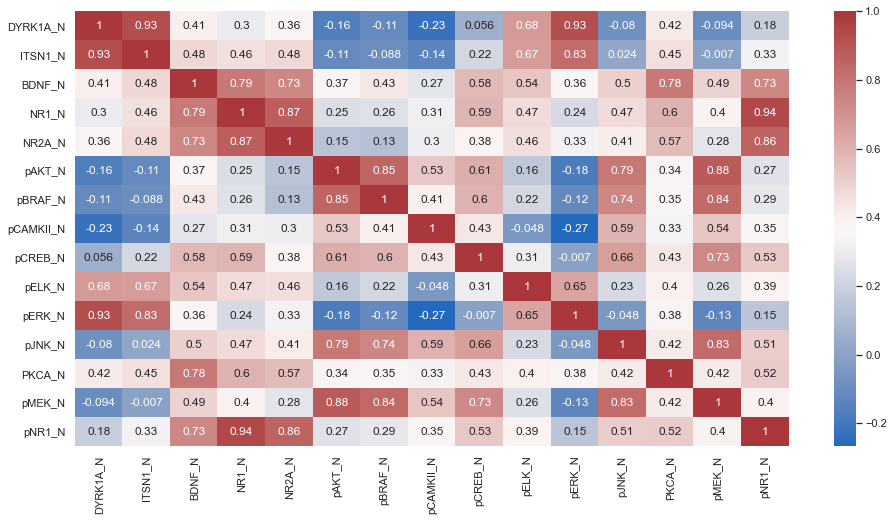

In [144]:
plt.figure(figsize=(16, 8))
sns.heatmap(round(spearman, 3), annot=True, cmap="vlag")

<AxesSubplot:>

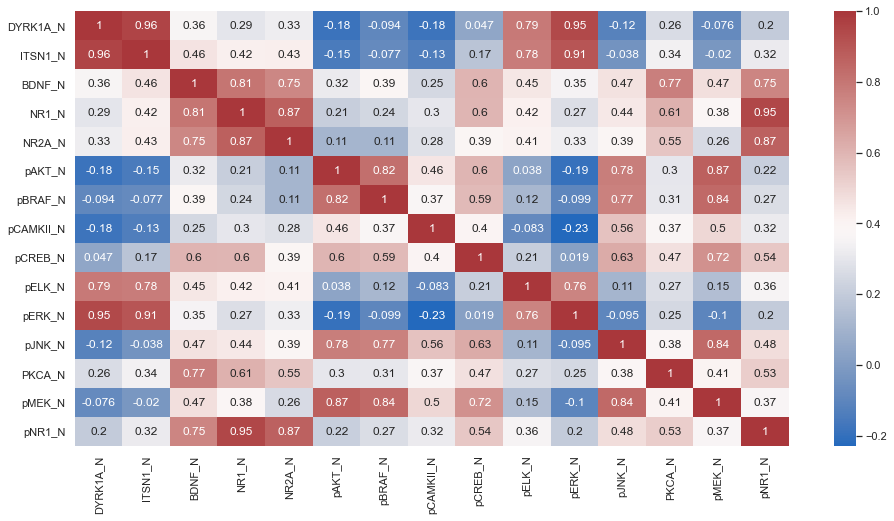

In [145]:
plt.figure(figsize=(16, 8))
sns.heatmap(round(pearson, 3), annot=True, cmap="vlag")

<AxesSubplot:>

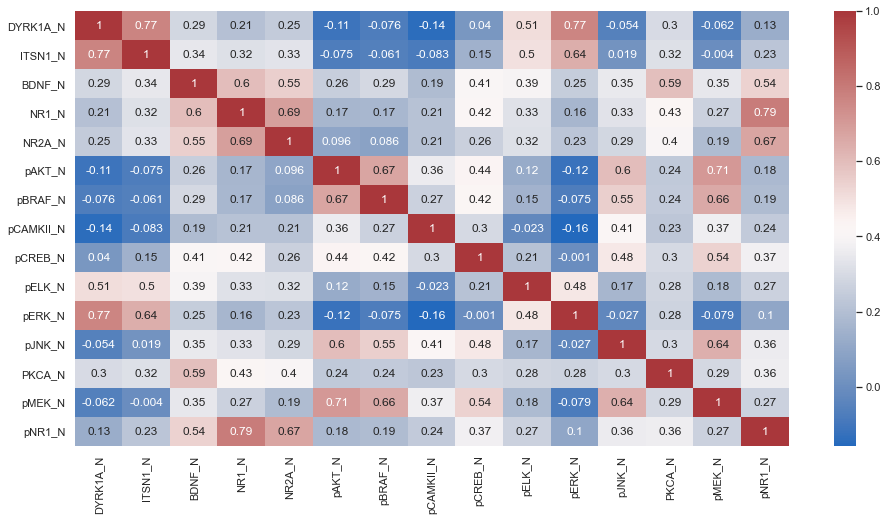

In [146]:
plt.figure(figsize=(16, 8))
sns.heatmap(round(kendall, 3), annot=True, cmap="vlag")

<AxesSubplot:>

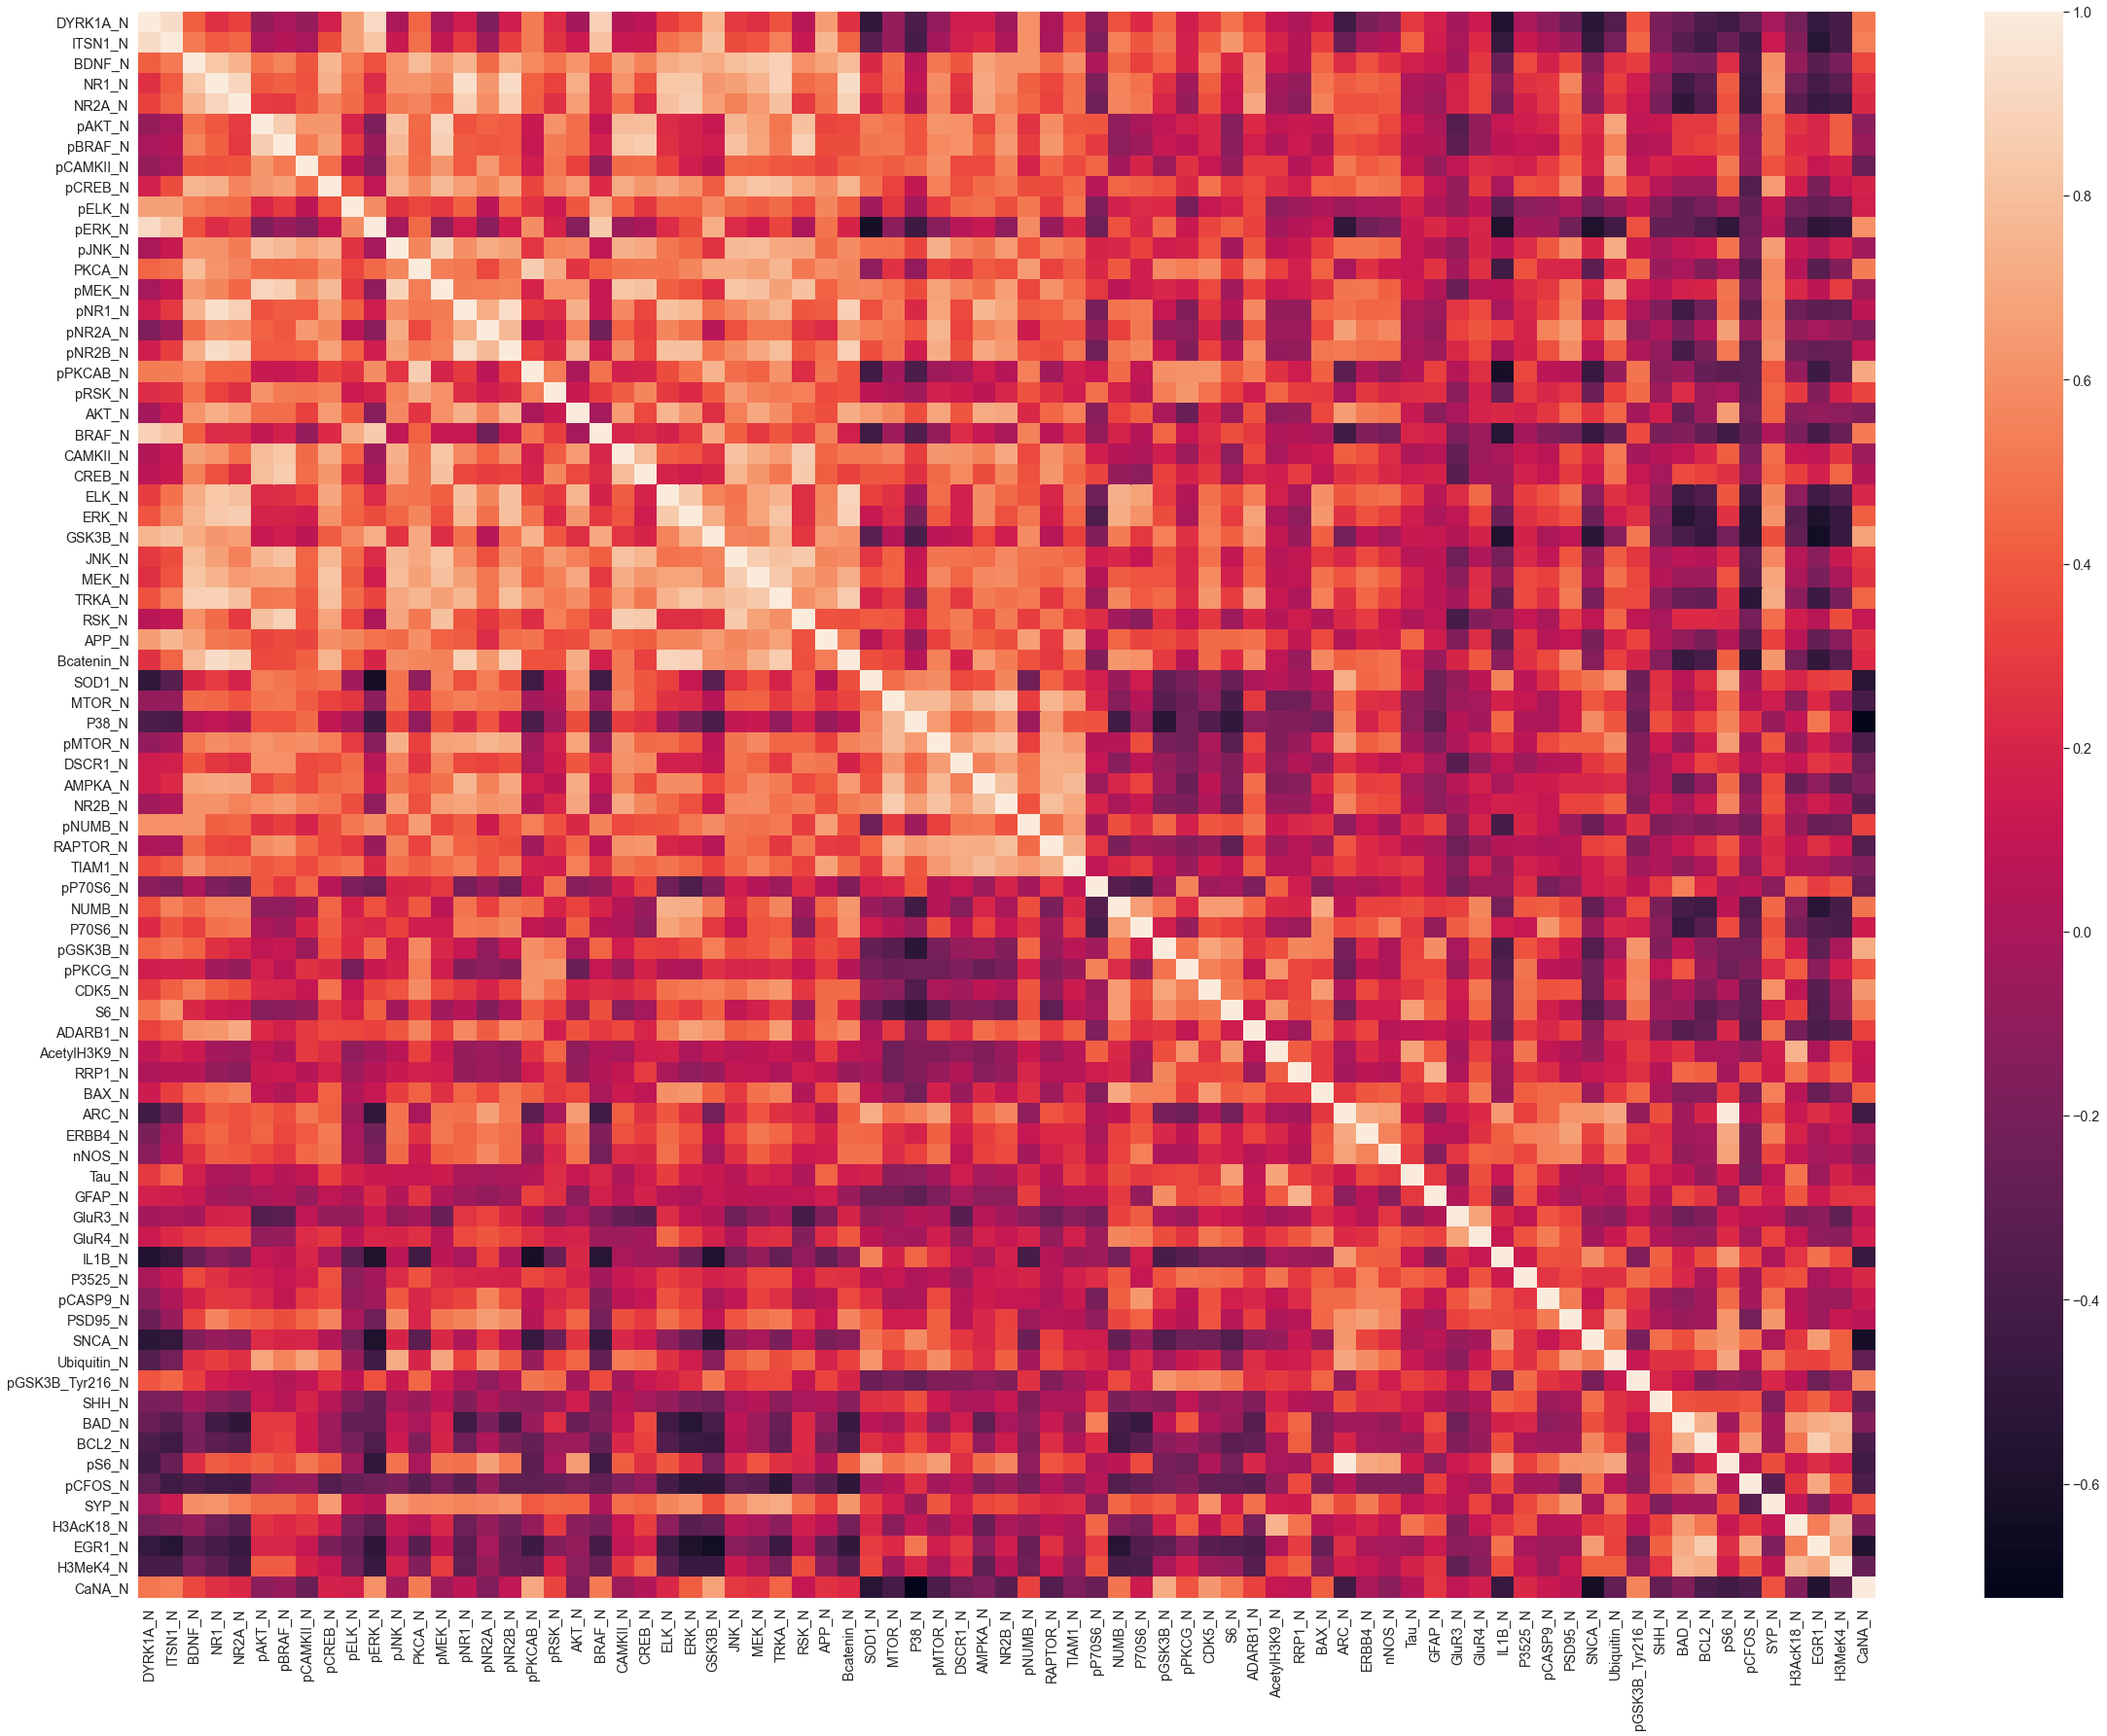

In [41]:
data2 = data.iloc[:, 1:].dropna()
spearman = data2.corr(method="spearman")
plt.figure(figsize=(40, 30))
sns.heatmap(spearman)

**Вывод:** с помощью heatmap удобно отслеживать коэффициенты корреляции между уровнями экспресси генов. Heatmap для коэффициентов Кендала показывает меньший уровень корреляции между экспресией генов, чем Спирмен и Пирсон. Это может быть связано с тем, что в данном случае выборка довольно большая, а коэффициент Кендала применим лучше для малых выборок.

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.



Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

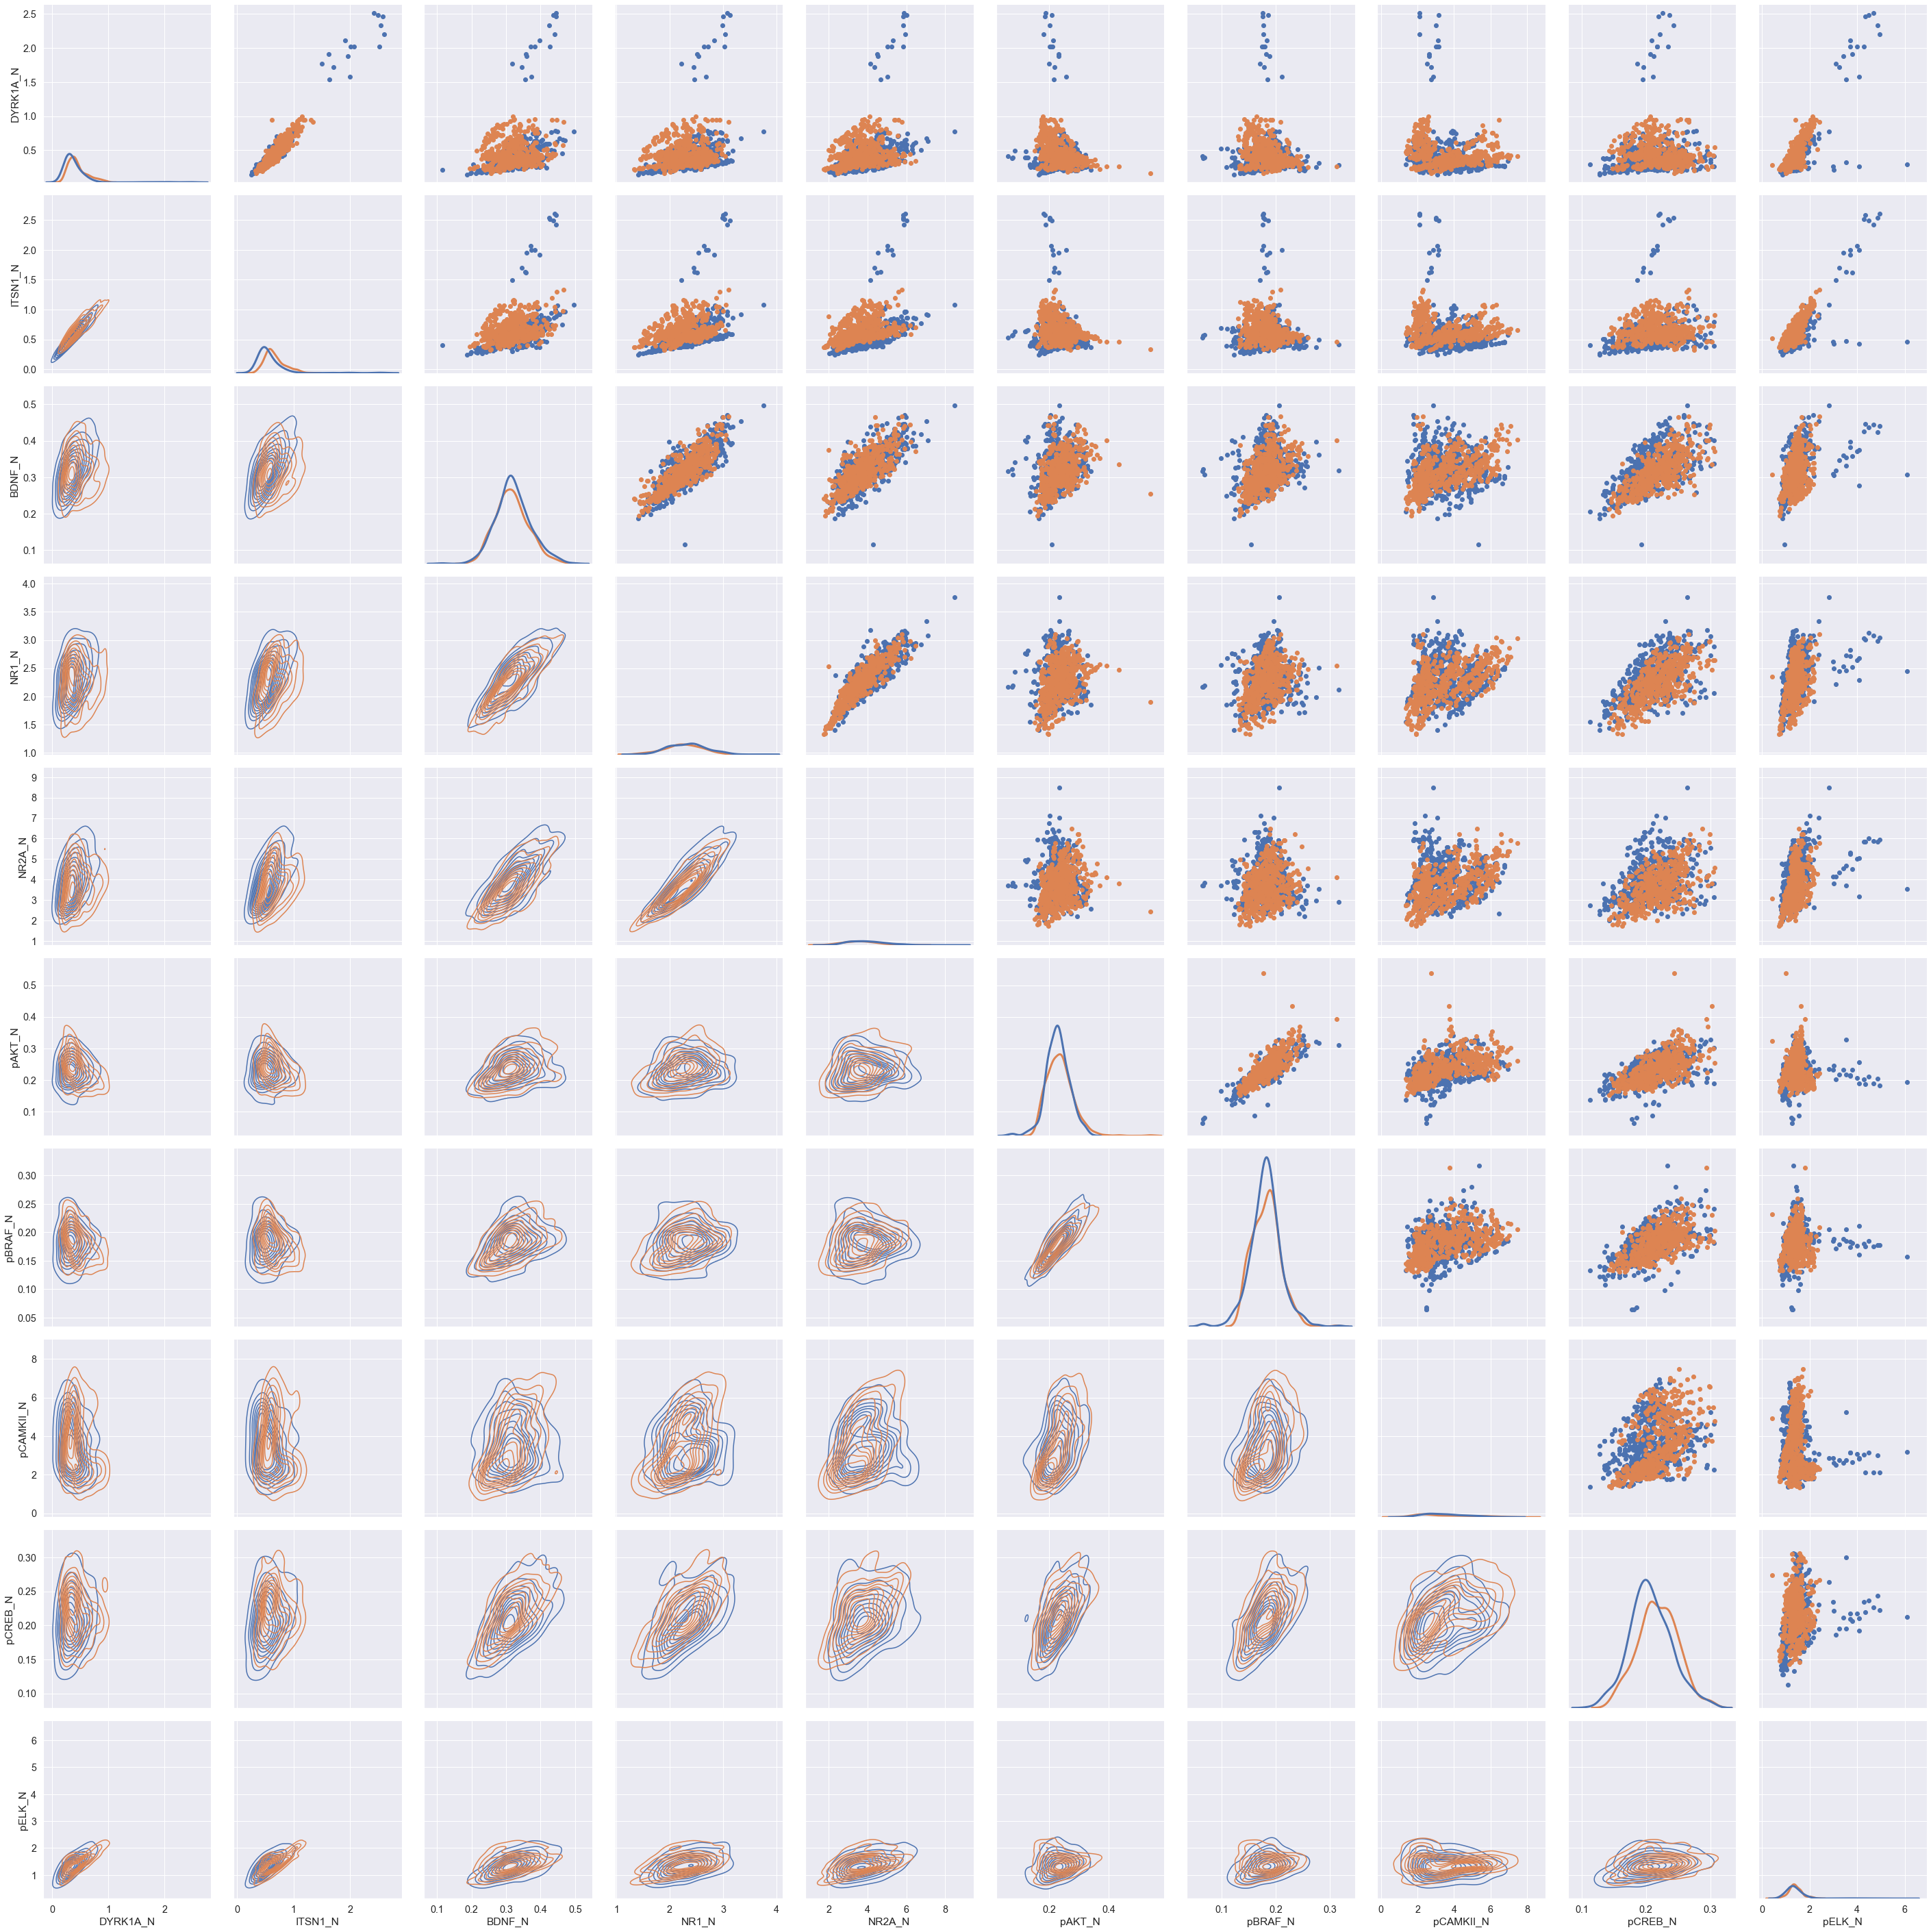

In [126]:
g = sns.PairGrid(data.iloc[:, 1:11].dropna().join(data.iloc[:, 78].dropna()), height=4, hue="Genotype")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#### 1. Корреляционный анализ

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 



С помощью ядерных оценок плотности посмотрите, как отличаются распределения `DYRK1A_N` для разных генотипов.

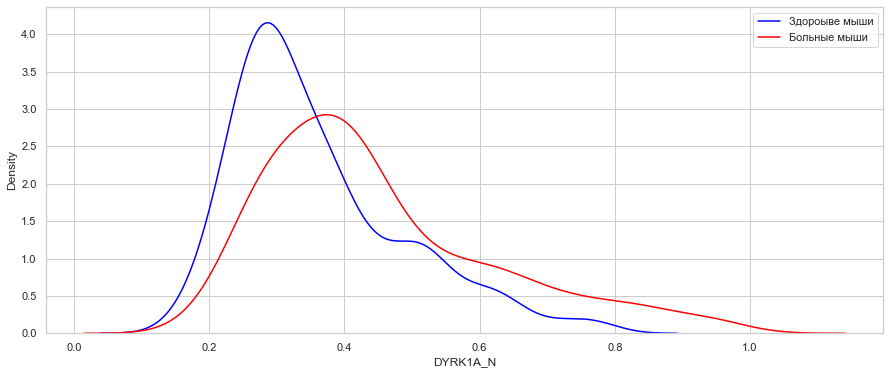

In [148]:
sns.set(context="notebook", style='whitegrid', palette='rainbow')
data_derk_healthy = data["DYRK1A_N"][:570].dropna()
data_derk_healthy = data_derk_healthy[data_derk_healthy < 1].dropna()
data_derk_ill = data["DYRK1A_N"][570:]
plt.figure(figsize=(15, 6))
sns.kdeplot(data_derk_healthy, label="Здороыве мыши", color="blue")
sns.kdeplot(data_derk_ill, label="Больные мыши", color="red")
plt.legend()

Избавьтесь от выбросов и `nan`. Разделите все значения на 5 корзин и составьте таблицу сопряженности. Можно воспользоваться функцией `np.histogram2d`. В итоге у вас должна получиться таблица размера $5\times2$.


In [149]:
borders = [0, 0.3, 0.35, 0.45, 0.55, 1]
counts = np.zeros(10).reshape(2, 5)
for j, data_d in enumerate([data_derk_healthy, data_derk_ill]):
    for i in range(len(borders) - 1):
        sample = data_d[borders[i] <= data_d]
        sample = sample[sample <= borders[i + 1]]
        counts[j][i] = len(sample)

table = pd.DataFrame(counts)
table.index = ["Здоровые", "Больные"]
table

0     1      2     3      4
Здоровые  229.0  92.0  111.0  71.0   52.0
Больные    96.0  68.0  156.0  66.0  121.0

Примените критерий хи-квадрат. Следите за условиями применимости критерия.

In [150]:
st, p = sps.chisquare(counts[1], counts[0] * np.sum(counts[1]) / np.sum(counts[0]))
print("p-value:", p)
print("Отвергаем:", p < 0.05)

p-value: 9.400573375446253e-44
Отвергаем: True


Сделайте выводы.

**Вывод** применив критерий Хи-квадрат, получили, что гипотеза о совпадении распределений отвергается, значит ген DYRK1A_N по-разному экспрессируется в клетках больных и здоровых мышей (распределение экспрессии другое), что было в общем-то видно невооружённым взглядом по kde (условия применимости хи-квадрат проверены и даже про нормировку не забыл).  

##### 1.1 Влияние генотипа на экспрессию BDNF_N

Проведите те же исследования для признака  BDNF_N, начиная с ядерных оценок. Сделайте выводы.

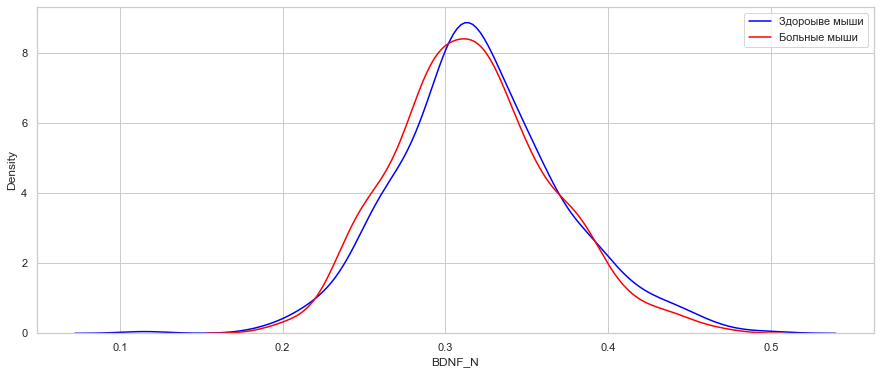

In [130]:
sns.set(context="notebook", style='whitegrid', palette='rainbow')
data_derk_healthy = data["BDNF_N"][:570].dropna()
data_derk_healthy = data_derk_healthy[data_derk_healthy < 1].dropna()
data_derk_ill = data["BDNF_N"][570:]
plt.figure(figsize=(15, 6))
sns.kdeplot(data_derk_healthy, label="Здороыве мыши", color="blue")
sns.kdeplot(data_derk_ill, label="Больные мыши", color="red")
plt.legend()

In [133]:
borders = [0, 0.3, 0.33, 0.35, 0.38, 5]
counts = np.zeros(10).reshape(2, 5)
for j, data_d in enumerate([data_derk_healthy, data_derk_ill]):
    for i in range(len(borders) - 1):
        sample = data_d[borders[i] <= data_d]
        sample = sample[sample <= borders[i + 1]]
        counts[j][i] = len(sample)

table = pd.DataFrame(counts)
table.index = ["Здоровые", "Больные"]
table

0      1     2     3     4
Здоровые  190.0  156.0  78.0  72.0  74.0
Больные   192.0  133.0  67.0  60.0  55.0

In [134]:
st, p = sps.chisquare(counts[1], counts[0] * np.sum(counts[1]) / np.sum(counts[0]))
print(p)

0.24106924869791224


**Вывод:** в этом случае распредлеения по kde были похожи, после нормировки и подбора корзин Хи-квадрат опять подтвердил зрительное наблюдение и не отвергнул гипотезу о совпадении параметров распределений, т.е. данный ген экспрессируется схожим образом у здоровых и больных мышей и его изучение в контексте исследования данного заболевания не имеет особого смысла.

Продолжение следует...